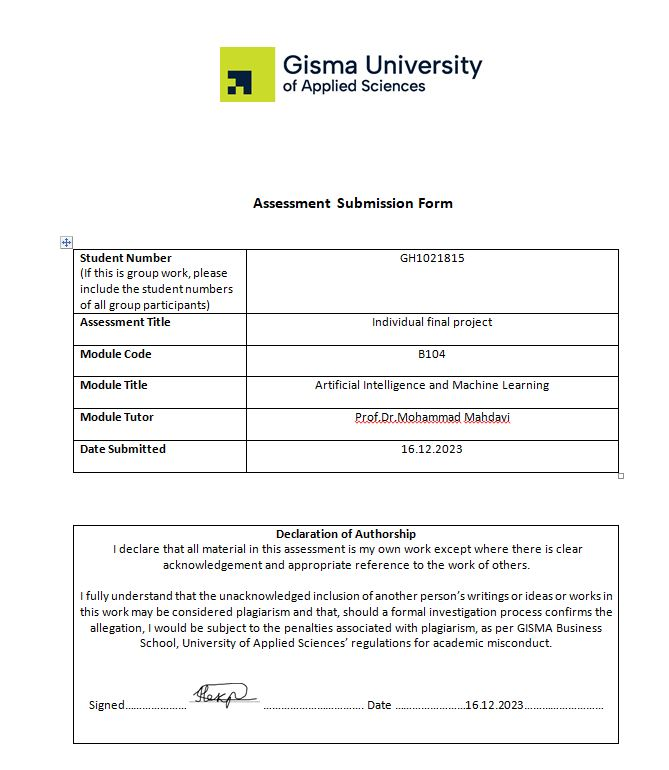

In [ ]:
from IPython.display import Image, display

display(Image(filename='Assesment submission form.PNG'))


##Machine learning Pipeline

##Business Problem


H, M.Y. (2022) Wine quality dataset, Kaggle. Available at: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset (Accessed: 09 December 2023).

Problem statement: Grocery shop would like to know which wine they need to buy. Commpany would like to know which wine has best quality and which parameters mmostly impact it. Further desicion on a price will be based on a quality of a wine.This problem could be defined as a classification problem, as we need to set a cdrtain quality for each sample



Benefits for the company: Further desicion on a price will be based on a quality of a wine.

Collecting data: Dataset with wine features and it is quality is provided

Machine learning task: Understand relationship between features and wine quality as well as find most valuable parameters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


#About Dataset:

* 'fixed acidity' :The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid.[8]
* 'volatile acidity': Volatile acidity is a measure of the low molecular weight (or steam distillable) fatty acids in wine and is generally perceived as the odour of vinegar[7]
* 'citric acid' : only values below 1.often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes[6]
* 'residual sugar':amount of sugar that remains in the wine after fermentation is complete. Different depends on wine type(but usually lower than 35)[5]
* 'chlorides' :Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains.[4]
* 'free sulfur dioxide' : free SO2 values of 25 mg/L on red wine and 30 mg /L on white wine are recommended. An active SO2 concentration of 0.35 mg/L ensures a minimum protection, a value of 0.6 mg/L maximum protection.[1]
* 'total sulfur dioxide' :total amount of sulfur dioxide present in a wine 150 ppm for red wine. 200 ppm for white wine, and 400 ppm for sweet wines[2]
* 'density' : aproximately 0.99 g/mL[2]
* 'pH':acidity or alkalinity of a solution, for wine usually between 3.1 - 3.6[3]
* 'sulphates' : sulfur dioxide inside wine, usually not more than 10 parts per million(a bit same to total sulfur dioxide but in wine production a bit different)[1]
* 'alcohol' : percent of alcohol inside wine ranges from about 8% to 15%[1]
* 'Id':number of wine

In this pipeline I will try to predict quality of wine. for this reason I firstly read a dataset and display first 5 rows

In [ ]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


As I have not so much rows and there is also not really a lot samples for high and low quality wine. So I combine classes with each other, so now I have three classes: lower than 4 = Low, 5 and 6 is Medium and everything higher is high quality

In [ ]:
def categorize_quality(quality):
    if  quality <= 4:
        return "Low"
    elif quality == 5 or quality ==6 :
        return "Medium"
    elif quality >= 7:
        return "High"

df['quality'] = df['quality'].apply(lambda x: categorize_quality(x))

In [ ]:
df['quality'] = df['quality'].astype('category')

In [ ]:
x = df.drop('quality', axis=1)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 46)


##Data Exploration

In this part I will investigate date to see which columns needs to be preprocessed in order to apply machine learning techniques

In [ ]:
print(x_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 379 to 837
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         914 non-null    float64
 1   volatile acidity      914 non-null    float64
 2   citric acid           914 non-null    float64
 3   residual sugar        914 non-null    float64
 4   chlorides             914 non-null    float64
 5   free sulfur dioxide   914 non-null    float64
 6   total sulfur dioxide  914 non-null    float64
 7   density               914 non-null    float64
 8   pH                    914 non-null    float64
 9   sulphates             914 non-null    float64
 10  alcohol               914 non-null    float64
 11  Id                    914 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 92.8 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 914 entries, 379 to 837
Series name: quality
Non-Null Count  Dtype   
----

All columns has class integer or float which  makes datapreprocessing step simpler(no need to convert object to numeric value for applying ML techniques)

In [ ]:
print("Features shape:",x_train.shape)
print("Goal variable shape",y_train.shape)

Features shape: (914, 12)
Goal variable shape (914,)


Size of a dataset is not really big, and it has only 12 features.

In [ ]:
column_names = x_train.columns.values
print("All columns presented:",column_names)

All columns presented: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'Id']


All columns presented in a dataframe in one array to make further steps simpler(do not get typo errors, by just copying them from here)

In [ ]:
null_counts = x_train.isnull().sum()
print("null values:",null_counts)

null values: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Id                      0
dtype: int64


No missing values presented in a dataframe

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'Id'}>]], dtype=object)

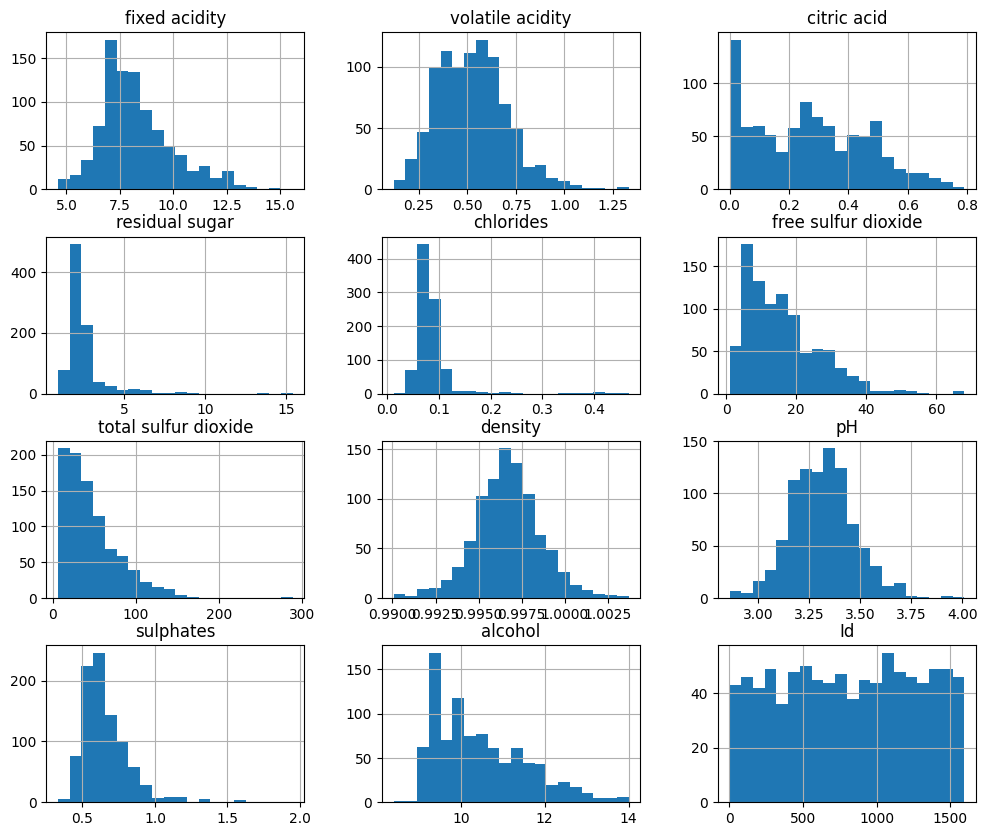

In [ ]:
x_train.hist(bins=20, figsize=(12, 10))  #

After Building distribution of all presented features, I realise that ID column needs to be dropped, as it may highly impact prediction in future. As for all other features they are seems to be distributed normally and no adjusting steps required

<Axes: >

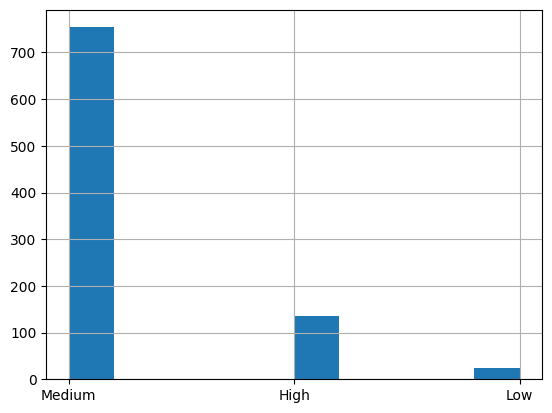

In [ ]:
y_train.hist()

I will apply oversampling as it increases my accuracy metrcis(and as you can see from picture there is not so much low quality wine)

To check for outliers in statistics 3 standard deviation method is used(all values which differs from mean more than 3 std are outliers). I implement it here using formula

In [ ]:
z = np.abs((x_train - x_train.mean()) / x_train.std())
outliers = (z > 3).all(axis=1)
print(x_train[outliers])

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, Id]
Index: []


No outliers found

##Data Preprocessing


Dropping Id column and increase number of samples for quality 4 and 7 in 2 times. I have tried different parameters, as well as without adding any parameters.But this gives me the best evaluation metrics

In [ ]:
x = x.drop('Id',axis = 1)

In [ ]:
smote = SMOTE(random_state=42)
x_train, y_train= smote.fit_resample(x_train, y_train)

##Feature engineering

Scale the features as it improves my evaluation metrcis

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Model Training

As I have classification problem, I have chosen three classification ML methods.I apply grid search for all methods to get the best hyperparameteres(for each method you could find the description of them)

Then I print best parameters selected for this model and see the accuracy score, to evaluate the best method(accuracy value is displayed, bigger value means better method)

#DecisionTreeClassifier

*   Criterion: Function to measure the quality of a split.
*  Splitter : strategy used to choose the split at each nodes.
*   max_depth : maximum depth of the tree

In [ ]:
param_grid={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']

}
cls = DecisionTreeClassifier()
cls_grid_search = GridSearchCV(cls, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
cls_grid_search.fit(x_train, y_train)
best_params = cls_grid_search.best_params_
print("Best Parameters:", best_params)
best_model = cls_grid_search.best_score_
print(best_model)

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
0.7820439938267987


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


#KNeighborsClassifier



*   n_neighbors : This Hyper parameter is very important because it considers number of neigbours on which  prediction is based
*   Weights: Responsible for weight of each neighbour(if uniform :each neighborhood are weighted equally;if distance: closer neighbors of a query point will have a greater influence)



In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
knn_grid_search.fit(x_train, y_train)
best_params = knn_grid_search.best_params_
print("Best Parameters:", best_params)
best_model = knn_grid_search.best_score_
print(best_model)

Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
0.9266033718181641


#SVC

*   kernel: Selects best kernel type
*   C :Regularization parameter,Smaller C value =higher bias,larger C = lower bias but higher variance.
* degree: Degree of the polynomial kernel(Higher degrees allow the model to capture more complex relationships in the data, but could cause overfitting)

In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf',],
    'C': [ 3, 5, 7],
    'degree': [1, 3]
}
svc = SVC()
svc_grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
svc_grid_search.fit(x_train, y_train)
best_params = svc_grid_search.best_params_
print("Best Parameters:", best_params)
best_model = svc_grid_search.best_score_
print(best_model)

Best Parameters: {'C': 7, 'degree': 1, 'kernel': 'rbf'}
0.9288274824669364


##Model evaluation

For evaluating the model I decided to choose 4 metrics:
1.Accuracy: how close is predicted value to a real value
2.Presicion: ratio of correct positive predictions to the overall number of positive predictions
3.Recall: Ratio of correct positive predictions to the overall number of positive predictions
4.f1 score: combination of recall and precision((2 * presicion * recall/precision+recall)
All of this metrics are simply displayed using classification report:
it displays all the metrics for each class and then calculates macro avg among all classes and weighted avg. Support column is displaying number of actual occurrences of the class in test set

              precision    recall  f1-score   support

        High       0.46      0.67      0.54        24
         Low       0.13      0.14      0.14        14
      Medium       0.90      0.84      0.87       191

    accuracy                           0.78       229
   macro avg       0.50      0.55      0.52       229
weighted avg       0.81      0.78      0.79       229



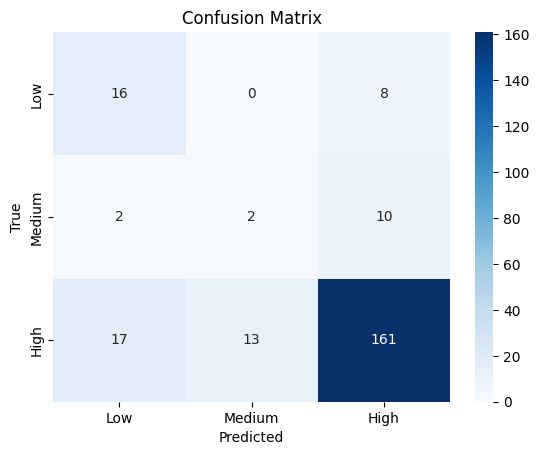

In [ ]:
y_pred = svc_grid_search.predict(x_test)
print(classification_report(y_test, y_pred))
confma = confusion_matrix(y_test, y_pred)
labels = ['Low', 'Medium', 'High']
sns.heatmap(confma, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Summary:

Strength:
* Model could predict class medium class of wine, because there was enough samples for machine to learn.
* A lot more samples could be added,as the model methods could be used for bigger dataframe
*You could choose hyperparameters for the model depends on your task


Limitations:
* Different type of wine could have different parameters to determine a quality( so this method could only work on one wine datatype)
*It would be very hard to predict wine with high quality and from the classification report that low quality wine captured only for 14%.
* May also not work properly for different types of wine(e.g. dry, sweet)


The results are showing that model is workking quite good(81% accuracy) but it for sure needs more data to solve the problem better. I also tried to split the classes in other way, but it gives me even worser evaluation metrics. This was because It is very hard to separate wine with value 5 and 6, so I tried different methods, but this gives me the best metrcis.In case capture of low/high quality wine is needed you might need to think about assigning classes in other way or maybe try only two type of wine(High,low) this will be binary classification, which for sure increase accuracy.

As for the recomendations, I would suggest to investigate more about different types of wine and add more wine with very good and very bad quality.




##References

1.(2020) SO2 and wine: A Review - International Organisation of Vine and wine. Available at: https://www.oiv.int/public/medias/7840/oiv-collective-expertise-document-so2-and-wine-a-review.pdf (Accessed: 09 December 2023).
2.Strid, L. (2021) How many calories are in a glass of red wine?, Aridus. Available at: https://www.ariduswineco.com/blog/how-many-calories-are-in-a-glass-of-red-wine (Accessed: 09 December 2023). \
3.Sulphur levels in wine (2021) Grape to Glass. Available at: https://grape-to-glass.com/index.php/sulphur-levels-wine/#:~:text=In%20most%20wine%20countries%20round,%2Flitre%20in%20white%20wines). (Accessed: 09 December 2023).
4.Coli, M.S. et al. (2022) Chloride concentration in red wines: Influence of terroir and grape type, Food Science and Technology. Available at: https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/#:~:text=1%2D%20Chloride%20concentration%20in%20the,the%20highest%20levels%20of%20chlorides. (Accessed: 09 December 2023).
5.Bibendum Wine (2021) What is residual sugar?, Bibendum Wine. Available at: https://www.bibendum-wine.co.uk/wine-gym/wine-and-residual-sugar/#:~:text=Residual%20sugar%20refers%20to%20the,wine)%20and%20releases%20carbon%20dioxide. (Accessed: 09 December 2023).
6.Hakim, S. (2018) Citric acid, Viticulture and Enology. Available at: https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid#:~:text=Citric%20acid%20is%20often%20added,acid%20is%20its%20microbial%20instability. (Accessed: 09 December 2023).
7. Ask the volatile acidity - australian wine research institute. Available at: https://www.awri.com.au/wp-content/uploads/2018/03/s1982.pdf (Accessed: 09 December 2023).
8.White, N.A. (2019) Fixed acidity, Waterhouse Lab. Available at: https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=The%20predominant%20fixed%20acids%20found,2%2C000%20mg%2FL%20succinic%20acid. (Accessed: 09 December 2023).